In [30]:
import pandas as pd
import requests
import io


# Ex. 1)
- Baixe o arquivo de dados CSV ageatmar disponível no repositório de datasets do R. Importe os dados num objeto da classe tibble em R ou da classe DataFrame em Python. Valide os dados importados verificando as variáveis (colunas) e as observações (linhas) importadas. Utilize a função summarize() no R ou describe() no Python para obter uma visão geral e resumida dos dados importados. Verifique a distribuição dos dados com uso de um histograma e gráfico de dispersão. Examine o histograma gerado e identifique um padrão ou característica notável, como distribuição de dados e outliers.

In [31]:
path = "https://vincentarelbundock.github.io/Rdatasets/csv/openintro/age_at_mar.csv"

df_age = pd.read_csv(path, index_col=0)
display(df_age.head())


,age
rownames,
1,32
2,25
3,24
4,26
5,32


In [32]:
df_age.describe()

,age
count,5534.000000
mean,23.440188
std,4.721365
min,10.000000
25%,20.000000
50%,23.000000
75%,26.000000
max,43.000000


<Axes: >

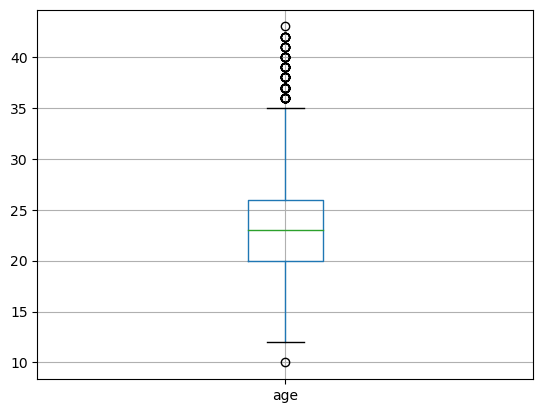

In [33]:
df_age.boxplot(column='age')

array([[<Axes: title={'center': 'age'}>]], dtype=object)

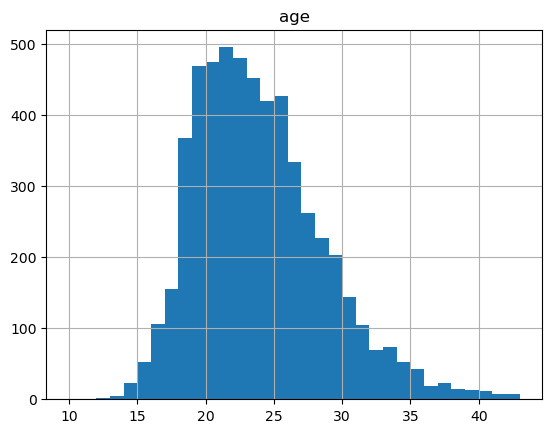

In [34]:
df_age.hist(column='age', bins=33, range=(10, 43))

**Comentários**


Weibull ou Log-Normal

---

# Ex. 2)

- Acesse o Portal de Dados Abertos do TSE. Selecione qualquer um arquivo CSV da categoria ”Resultados”. Baixe e descompacte o arquivo. Dentro do arquivo ZIP baixado, localize o arquivo leiame-x.pdf. Abra o leiame-x.pdf para identificar o encoding dos dados e os nomes das variáveis presentes no arquivo CSV. Importe os dados, usando essas informações, num objeto da classe tibble em R ou da classe DataFrame em Python. Valide os dados importados verificando as variáveis (colunas) e as observações (linhas) importadas. Utilize a função summarize() no R ou describe() no Python para obter uma visão geral e resumida dos dados importados (Fonte).

In [37]:
path = "https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/correspesp/CESP_2t_AC_291020221210.zip"
response = requests.get(path)

# Passa a resposta para um objeto do tipo BytesIO
zip_file = io.BytesIO(response.content)

# Extrai o conteúdo do arquivo zip
import zipfile
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('./extracted')
    


O arquivo escolhido foi ccont_2t_AC-291020221210.csv. O arquivo leia-me correspondene é leiame-corresp-esperada-contingencia.pdf, segundo o qual o encoding do .csv é "Latin 1" e as variáveis presentes são:

- DT_GERACAO
- HH_GERACAO
- CD_PLEITO
- SG_UF
- CD_MUNICIPIO
- NM_MUNICIPIO
- NR_ZONA
- NR_URNA_ESPERADA
- CD_CARGA_URNA_ESPERADA
- CD_FLASHCARD_URNA_ESPERADA
- DT_CARGA_URNA_ESPERADA
- DT_CARGA_URNA_ESPERADA

In [41]:
path = "./extracted/ccont_2t_AC_291020221210.csv"
df_tse = pd.read_csv(path, sep=';', encoding='latin1')
display(df_tse.head())

,DT_GERACAO,HH_GERACAO,CD_PLEITO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_URNA_ESPERADA,CD_CARGA_URNA_ESPERADA,CD_FLASHCARD_URNA_ESPERADA,DT_CARGA_URNA_ESPERADA,ST_CORRESP_ALTERADA
0,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1101632,165404163437130713256575,1DD6178A,22/09/2022 13:26:00,*
1,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1101090,13989012547866195897669,15F7E34D,22/09/2022 13:33:00,*
2,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1102647,619949614482833439150880,1DD6178A,22/09/2022 14:28:00,*
3,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1015087,721060728818833878710264,15F7E34D,22/09/2022 14:09:00,*
4,29/10/2022,12:10:04,407,AC,1120,ACRELÂNDIA,8,1106252,569444561377674188648658,1DD6178A,22/09/2022 14:09:00,*


In [43]:
df_tse.describe()

,CD_PLEITO,CD_MUNICIPIO,NR_ZONA,NR_URNA_ESPERADA
count,725.0,725.000000,725.000000,7.250000e+02
mean,407.0,1259.393103,4.834483,1.600724e+06
std,0.0,186.036617,2.902213,3.900661e+05
min,407.0,1007.000000,1.000000,1.004227e+06
25%,407.0,1074.000000,2.000000,1.225391e+06
50%,407.0,1392.000000,4.000000,1.662987e+06
75%,407.0,1392.000000,8.000000,2.045019e+06
max,407.0,1570.000000,9.000000,2.048290e+06


# Ex. 3)
- Faça os itens 1–5 da Seção 23.5 da referência [56].